In [1]:
# -*- coding: utf-8 -*-
"""
DDA 3020 Assignment 3

Created on Mon Apr 24 2023

@author: zhimingmei

"""

'\nDDA 3020 Assignment 3\n\nCreated on Mon Apr 24 2023\n\n@author: zhimingmei\n\n'

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing

import os
import math

# Question 1

In [32]:
# pc path
data_path = 'PATH'
os.chdir(data_path)

# server path
# data_path_server = ''

In [33]:
df1 = pd.read_csv('penguins.csv')

## Data Processing

In [34]:
# check imcomplete data
def check_null(df):
    '''
    description: 
        if this dataset has null value, 
        then this function will help return the distribution of null value
    '''
    null_vals = df.isna().sum().sort_values(ascending=False)
    null_vals[null_vals>0]

    plt.title('Distribution of null values')
    null_vals[null_vals>0].plot(kind='hist')
    
    fig = plt.figure(figsize=(40,10))
    plt.title('Null value counts in columns')
    plt.xlabel('Columns')
    plt.ylabel('Counts')
    null_vals[null_vals>0].plot(kind='bar')

print('summary of nan data: ', df1.isna().sum())
print('summary of null data: ', df1.isnull().sum())

summary of nan data:  species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
summary of null data:  species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [35]:
values = {'bill_length_mm': df1['bill_length_mm'].mean(), 'bill_depth_mm': df1['bill_depth_mm'].mean(),\
          'flipper_length_mm': df1['flipper_length_mm'].mean(), 'body_mass_g': df1['body_mass_g'].mean()}
df1.fillna(value=values, inplace=True)
df1.dropna(subset=['sex'], inplace=True)

In [36]:
# Summary statistics
df1.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [37]:
df1['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

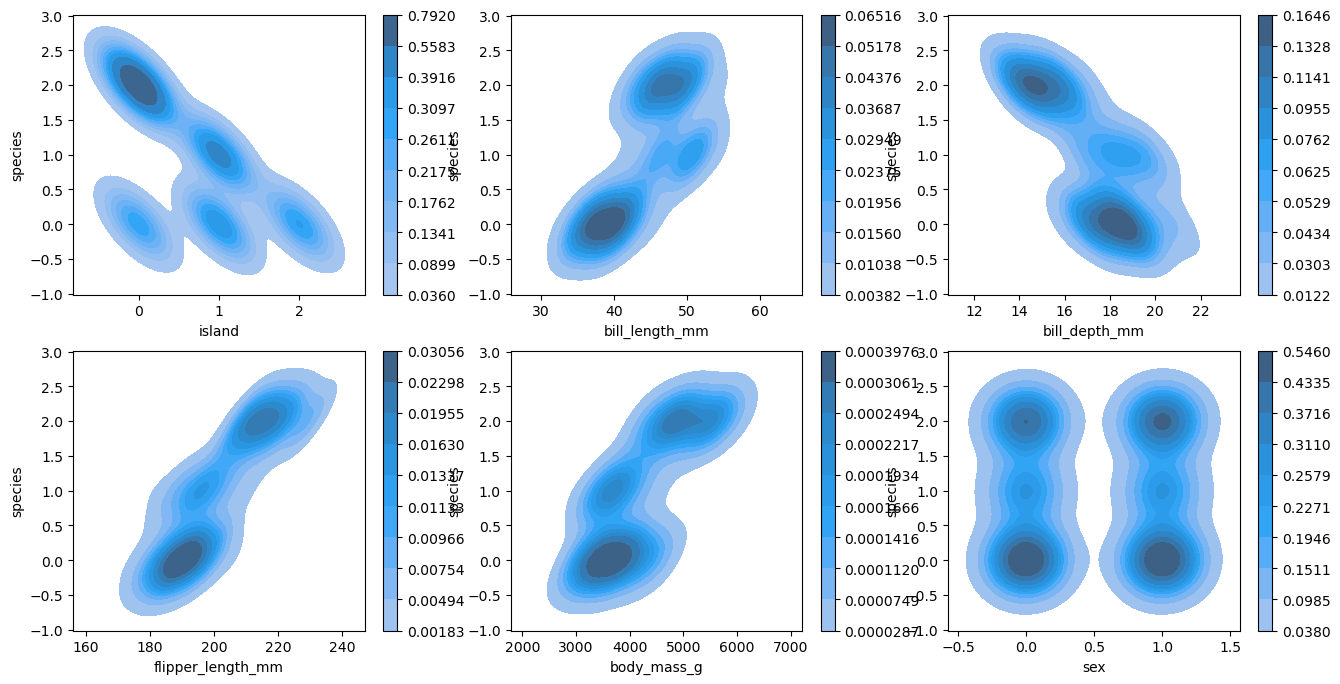

In [38]:
# encode the categorical data
from sklearn.preprocessing import LabelEncoder

attributes = ['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

to_encode = ['species', 'island', 'sex']
for i in to_encode:
    le = LabelEncoder()
    df1[i] = le.fit_transform(df1[i])

fig, axs = plt.subplots(2,3, figsize=(16,8))

for i in range(len(attributes)):
   sns.kdeplot(data=df1, x=attributes[i], y='species', shade=True, cbar=True, ax=axs[i//3, i%3])

In [39]:
from sklearn.model_selection import train_test_split
X = df1.drop(columns='species')
y = df1['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

## Decision Tree

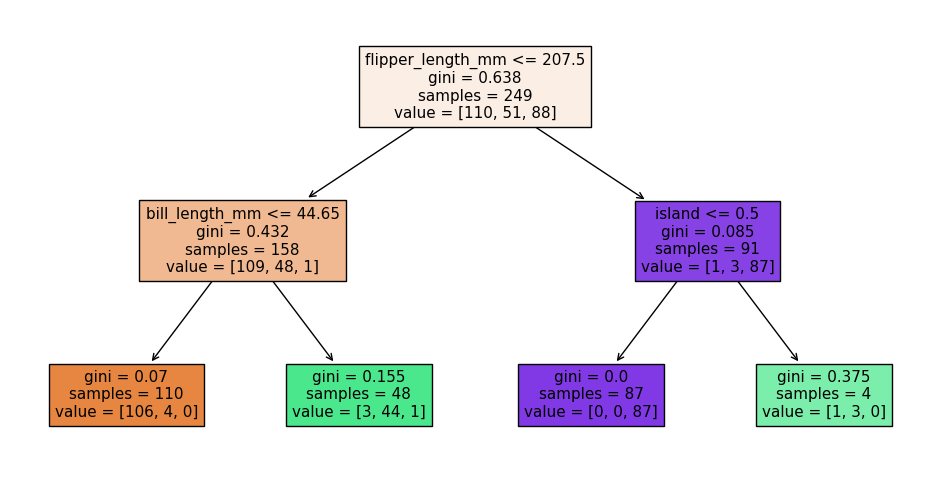

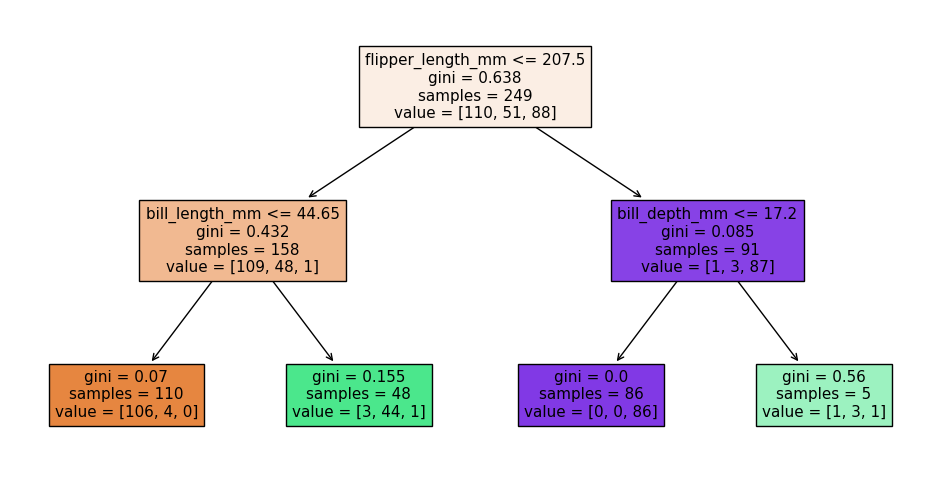

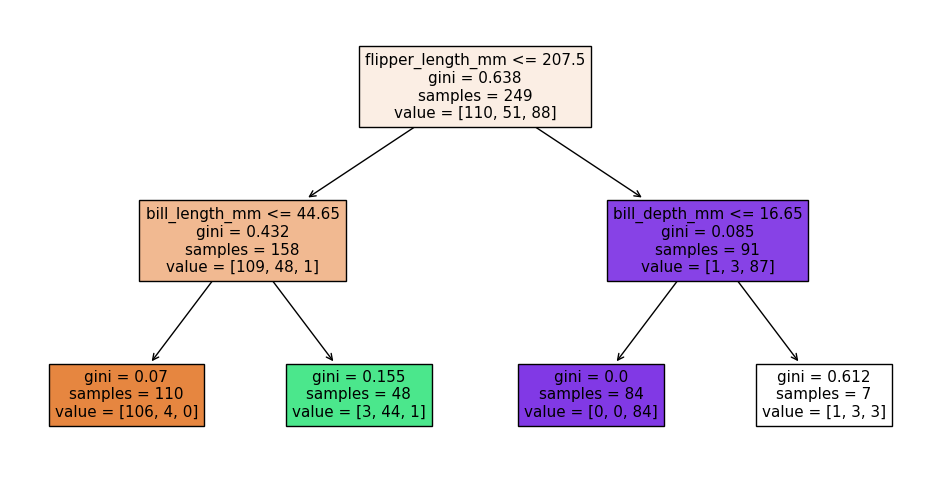

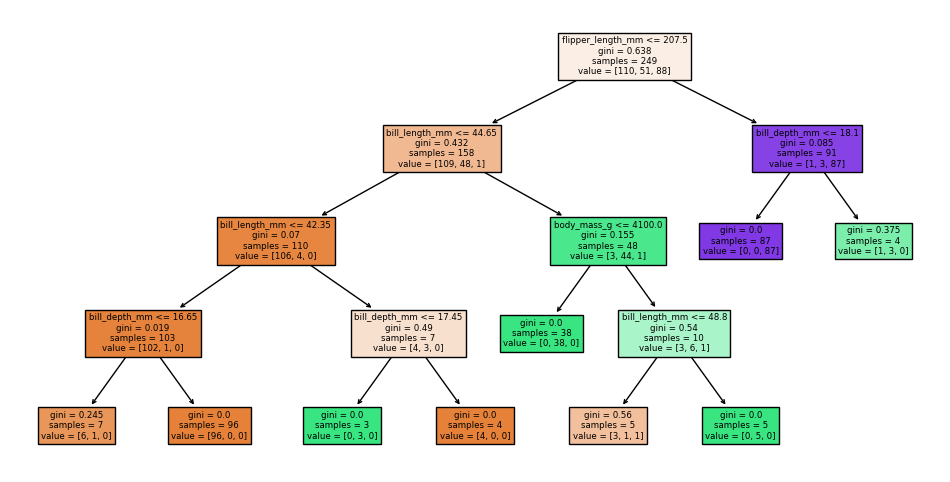

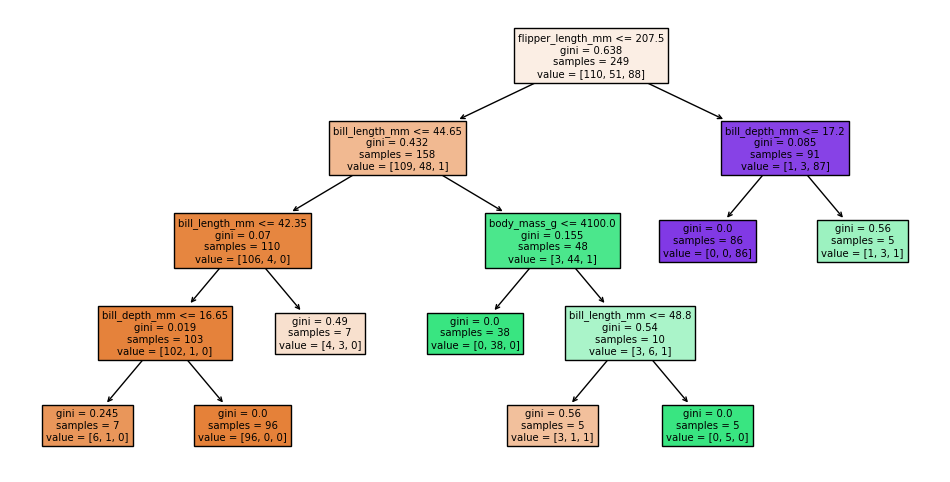

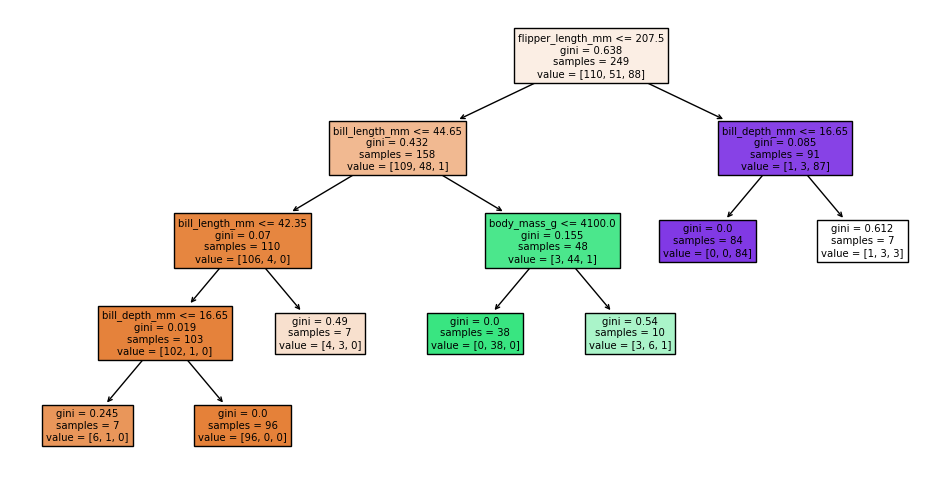

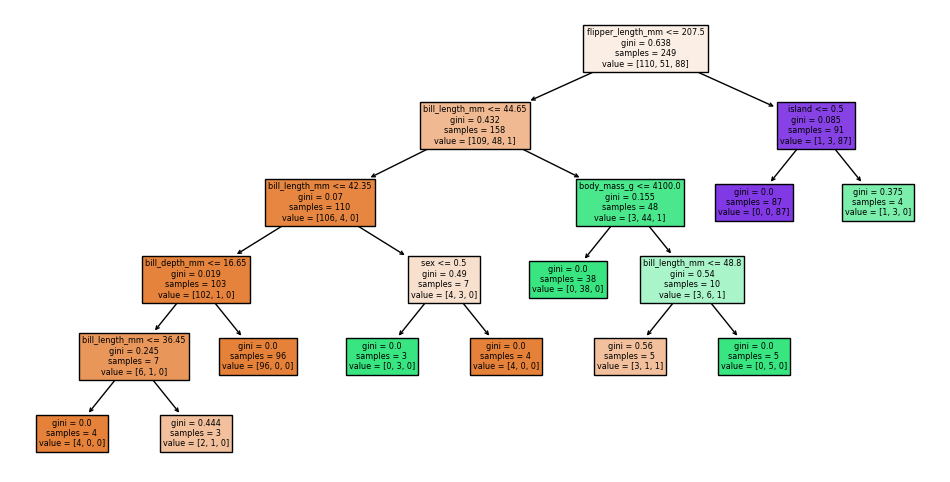

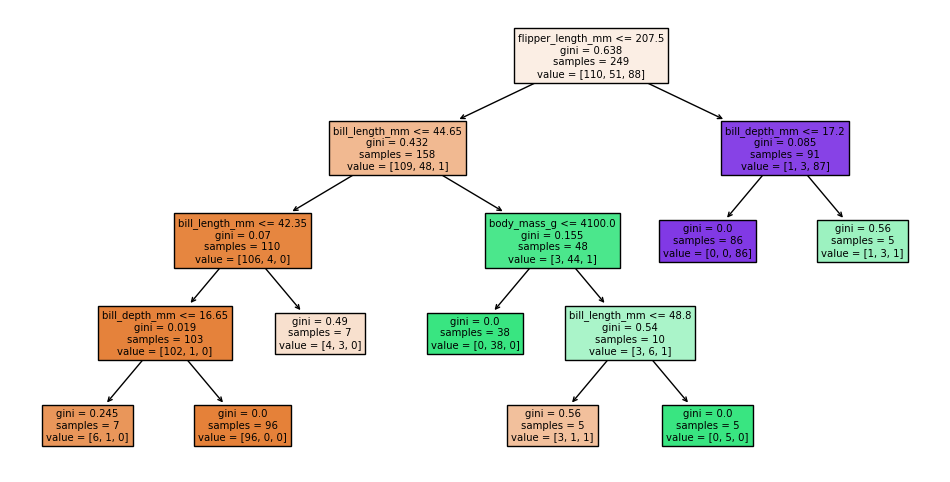

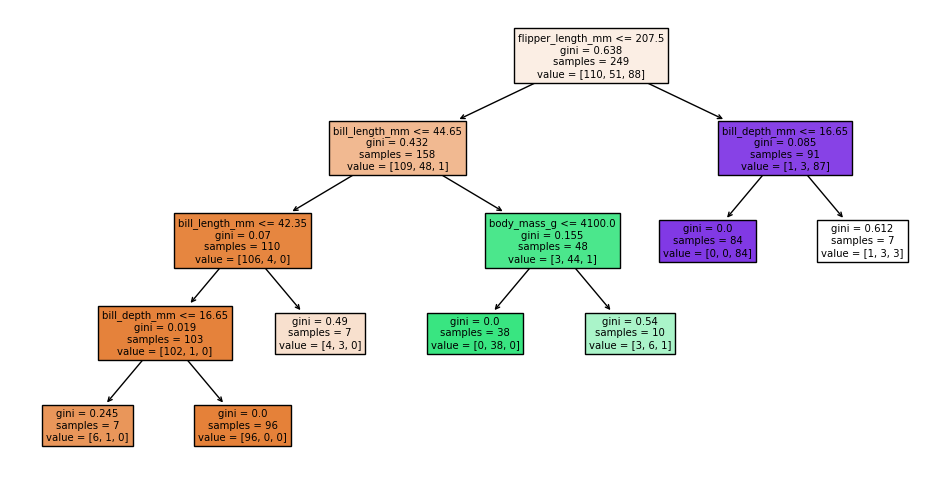

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
max_depth = [2, 4, 6]
min_size = [3, 5, 7]
train_score = []
test_score = []
depth_lst = []
size_lst = []
for depth in max_depth:
    for size in min_size:
        # get the params
        depth_lst.append(depth)
        size_lst.append(size)

        # train the decision tree, and get the scores
        clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=size)
        clf.fit(X=X_train, y=y_train)
        score1 = clf.score(X=X_train, y=y_train)
        train_score.append(score1)
        score2 = clf.score(X=X_test, y=y_test)
        test_score.append(score2)

        # draw the trees
        plt.figure(figsize=(12,6))
        plot_tree(clf, feature_names=X.columns, impurity=True, filled=True)
        plt.show()

In [12]:
# report the result
d = {'max_depth': depth_lst, 'min_size': size_lst, 'train_score': train_score, 'test_score': test_score}
result = pd.DataFrame(data=d)
result

,max_depth,min_size,train_score,test_score
0,2,3,0.963855,0.952381
1,2,5,0.959839,0.940476
2,2,7,0.951807,0.904762
3,4,3,0.983936,0.964286
4,4,5,0.967871,0.940476
5,4,7,0.951807,0.904762
6,6,3,0.983936,0.976190
7,6,5,0.967871,0.940476
8,6,7,0.951807,0.904762


## Bagging of Trees

In [13]:
from sklearn.ensemble import BaggingClassifier

num_tree = [3, 5, 10]
train_score_bag = []
test_score_bag = []
num_lst = []
for depth in max_depth:
    for num in num_tree:
        # get param
        num_lst.append(num)
        
        # train the model
        clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth), n_estimators=num)
        clf.fit(X_train, y_train)

        # get scores
        score1 = clf.score(X=X_train, y=y_train)
        train_score_bag.append(score1)
        score2 = clf.score(X=X_test, y=y_test)
        test_score_bag.append(score2)

In [14]:
d = {'max_depth': depth_lst, 'num_tree': num_lst, 'train_score': train_score_bag, 'test_score': test_score_bag}
result_bag = pd.DataFrame(data=d)
result_bag

,max_depth,num_tree,train_score,test_score
0,2,3,0.963855,0.952381
1,2,5,0.959839,0.952381
2,2,10,0.963855,0.964286
3,4,3,0.995984,0.976190
4,4,5,0.995984,1.000000
5,4,10,0.995984,1.000000
6,6,3,0.995984,0.976190
7,6,5,0.995984,0.988095
8,6,10,0.995984,0.988095


## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

m_value = [2, 4, 6]
num_tree = [1, 3, 5]
train_score_rf = []
test_score_rf = []
m_lst = []
num_lst = []
for num in num_tree:
    for m in m_value:
        # get param
        
        m_lst.append(m)
        num_lst.append(num)
        # train the model
        clf = RandomForestClassifier(n_estimators=num, max_features=m)
        clf.fit(X_train, y_train)

        # get scores
        score1 = clf.score(X=X_train, y=y_train)
        train_score_rf.append(score1)
        score2 = clf.score(X=X_test, y=y_test)
        test_score_rf.append(score2)

In [50]:
d = {'num_tree': num_lst, 'm_value': m_lst, 'train_score': train_score_rf, 'test_score': test_score_rf}
result_rf = pd.DataFrame(data=d)
result_rf

,num_tree,m_value,train_score,test_score
0,1,2,0.987952,0.976190
1,1,4,0.983936,0.904762
2,1,6,0.983936,0.904762
3,3,2,0.987952,0.904762
4,3,4,1.000000,0.964286
5,3,6,0.991968,0.916667
6,5,2,1.000000,0.976190
7,5,4,0.991968,0.904762
8,5,6,1.000000,0.964286


## Report Bias and Variance

In [45]:
from mlxtend.evaluate import bias_variance_decomp
num_tree = list(range(10, 101, 10))
bias_sqrt = []
variance = []

for num in num_tree:
    # train the model
    clf = RandomForestClassifier(n_estimators=num)
    clf.fit(X_train, y_train)
    
    # get evaluations
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse')
    bias_sqrt.append(avg_bias**2)
    variance.append(avg_var)

<AxesSubplot:xlabel='num_tree'>

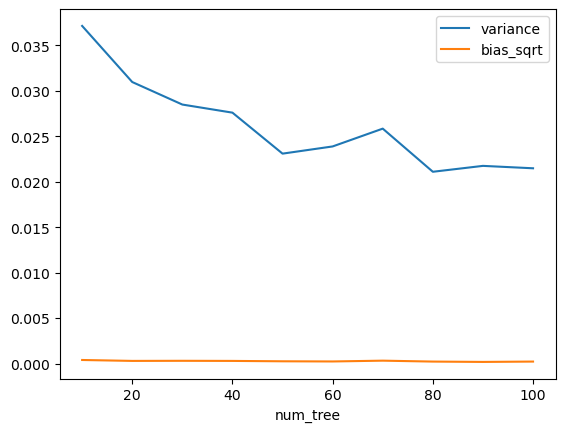

In [46]:
d = {'num_tree': num_tree, 'bias_sqrt': bias_sqrt, 'variance': variance}
result_rf2 = pd.DataFrame(data=d)
result_rf2.plot(y=['variance', 'bias_sqrt'] , x='num_tree', kind='line')

In [19]:
result_rf2

,num_tree,bias_sqrt,variance
0,10,0.000049,0.014077
1,20,0.000021,0.011793
2,30,0.000035,0.010646
3,40,0.000033,0.009533
4,50,0.000027,0.010732
5,60,0.000021,0.010082
6,70,0.000030,0.010064
7,80,0.000025,0.009427
8,90,0.000020,0.009156
9,100,0.000028,0.009199


# Question 2

In [20]:
# pc version... 
# df_train = pd.read_csv('train.csv', nrows=1000)
# df_test = pd.read_csv('test.csv', nrows=100)

# server version
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [21]:
X_train = df_train.drop(columns=['Id', 'Category']).values
y_train = df_train['Category'].values

X_test = df_test.drop(columns=['label']).values
y_test = df_test['label'].values

# normalize 
X_train = X_train/255
X_test = X_test/255

In [22]:
from sklearn.neural_network import MLPClassifier

# required hyperparameters
num_layers = [1, 2, 3]
num_nodes = [50, 200, 784]
optimizers = ['adam', 'sgd']

# other hyperparameters
learning_rate = [0.001, 0.01, 0.05]

# hyperparameters list
layers_lst = []
nodes_lst = []
opt_lst = []
rate_lst = []
hidden_size_lst = []

train_score_mlp = []
test_score_mlp = []

for layer in num_layers:
    for node in num_nodes:
        for opt in optimizers:
            for rate in learning_rate:
                try:
                    
                    hidden_size = tuple([node]*layer)
                    print(f'start {hidden_size}, with learning rate {rate}')
                    # store the hyperparameters
                    layers_lst.append(layer)
                    nodes_lst.append(node)
                    opt_lst.append(opt)
                    rate_lst.append(rate)
                    hidden_size_lst.append(hidden_size)

                    # train the model
                    clf =  MLPClassifier(hidden_layer_sizes=hidden_size, solver=opt, learning_rate_init=rate)
                    clf.fit(X=X_train, y=y_train)
        
                    # get scores
                    score1 = clf.score(X=X_train, y=y_train)
                    train_score_mlp.append(score1)
                    score2 = clf.score(X=X_test, y=y_test)
                    test_score_mlp.append(score2)
                    print(f'hidden size {hidden_size}, with {opt} and learning rate {rate} completed')
                except: 
                    print(f'missing {hidden_size}, with {opt} and learning rate {rate} ')
                    continue

In [23]:
d = {'num_layers': layers_lst, 'num_nodes': nodes_lst, 'hidden_size': hidden_size_lst,\
     'optimizer': opt_lst, 'learning_rate': rate_lst, 'train_score': train_score_mlp, 'test_score': test_score_mlp}
result_mlp = pd.DataFrame(data=d)
result_mlp.to_csv('result_mlp.csv')
result_mlp

In [84]:
# analyze the result
# back to the pc...
# we visualize some results here
result_path = 'PATH'
os.chdir(result_path)

df2 = pd.read_csv('result_mlp_norm.csv', index_col=0)
df2.head()

,num_layers,num_nodes,hidden_size,optimizer,learning_rate,train_score,test_score
0,1,50,"(50,)",adam,0.001,0.973550,0.8780
1,1,50,"(50,)",adam,0.010,0.915650,0.8677
2,1,50,"(50,)",adam,0.050,0.852233,0.8421
3,1,50,"(50,)",sgd,0.001,0.894400,0.8775
4,1,50,"(50,)",sgd,0.010,0.958883,0.8815


/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


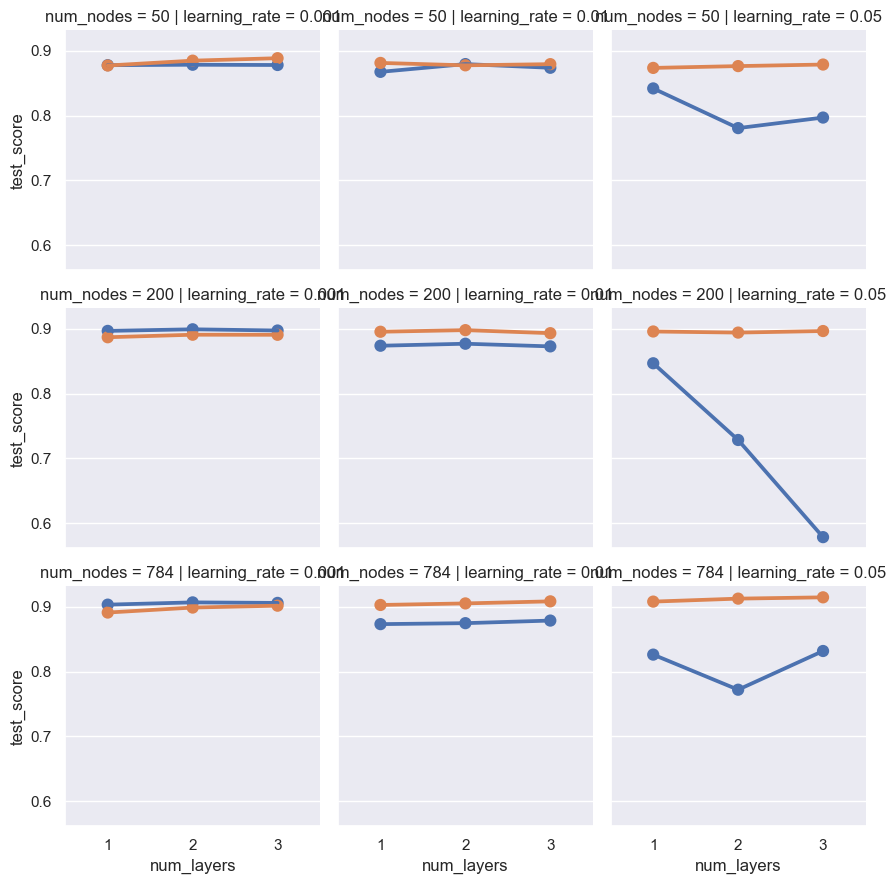

In [88]:
grid = sns.FacetGrid(df2, col='learning_rate', row='num_nodes' , hue='optimizer')
grid.map(sns.pointplot, 'num_layers', 'test_score')

/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


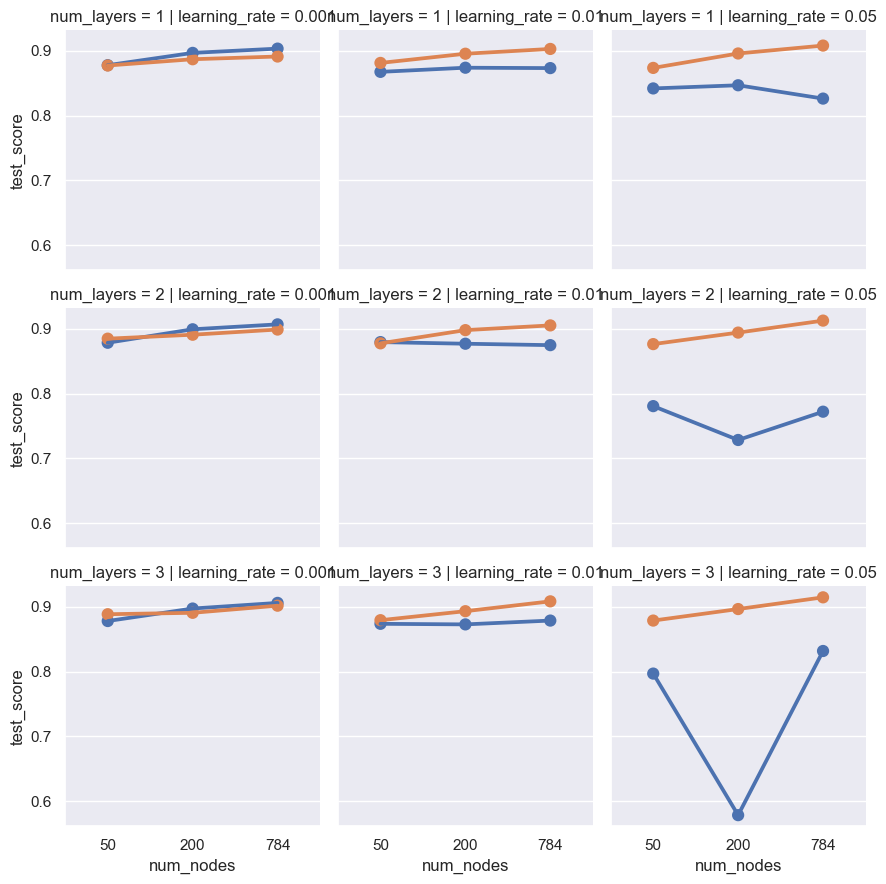

In [90]:
grid = sns.FacetGrid(df2, col='learning_rate', row='num_layers', hue='optimizer')
grid.map(sns.pointplot, 'num_nodes', 'test_score')

/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


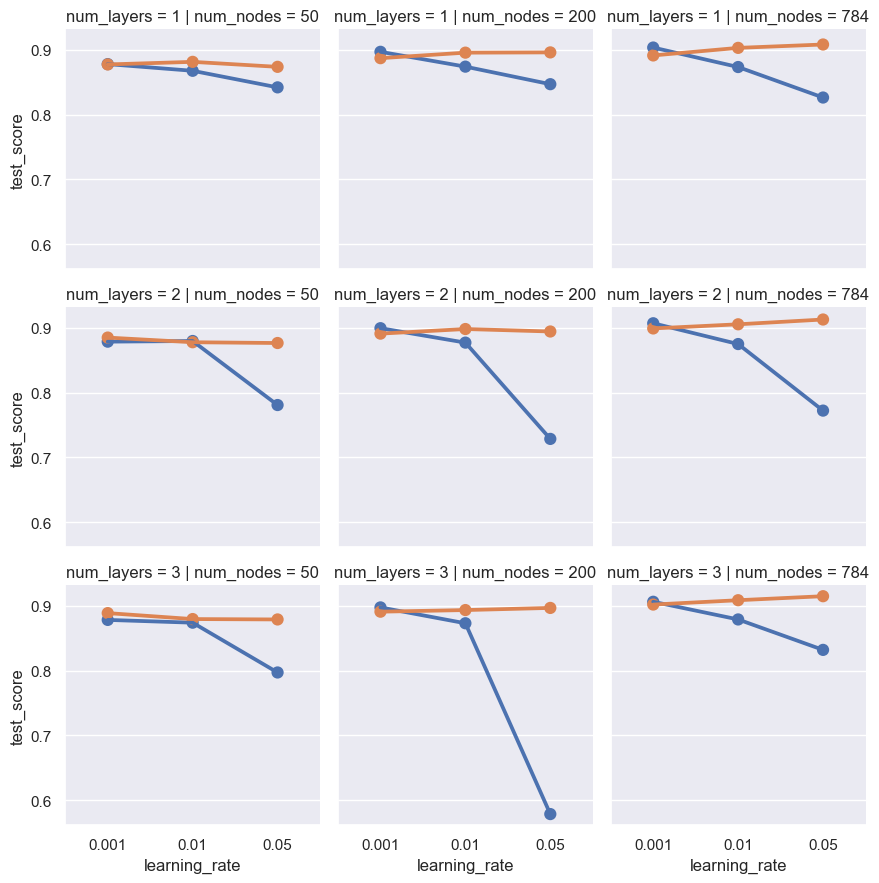

In [91]:
grid = sns.FacetGrid(df2, col='num_nodes', row='num_layers', hue='optimizer')
grid.map(sns.pointplot, 'learning_rate', 'test_score')